<a href="https://colab.research.google.com/github/ehye1/data-python/blob/main/chapter7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**07-1 결측치 정제하기**

In [1]:
#결측치 만들기
import pandas as pd
import numpy as np

df = pd.DataFrame({'sex' : ['M', 'F', np.nan, 'M', 'F'],
                   'score' : [5, 4, 3, 4, np.nan]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [2]:
df['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
4    NaN
Name: score, dtype: float64

In [3]:
#결측치 확인하기
pd.isna(df)

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [4]:
#결측치 개수 출력
pd.isna(df).sum()

sex      1
score    1
dtype: int64

In [5]:
#결측치 제거하기
df.dropna(subset = ['score'])

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [6]:
df_nomiss = df.dropna(subset = ['score'])
df_nomiss['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
Name: score, dtype: float64

In [7]:
#결측치가 하나라도 있으면 제거하기
#df.dropna(subset = ['score', 'sex'])와 같다
df_nomiss2 = df.dropna()
df_nomiss2

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [8]:
#평균값으로 결측치 대체하기
exam = pd.read_csv('exam.csv')  #데이터 불러오기
exam.loc[[2, 7, 14], ['math']] = np.nan  #2, 7, 14행의 math에 NaN 할당
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [9]:
#평균구하기
exam['math'].mean()

55.23529411764706

In [10]:
exam['math'] = exam['math'].fillna(55)
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,55.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,55.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [11]:
#결측치 빈도 확인
exam['math'].isna().sum()

0

**07-2 이상치 정제하기**

In [12]:
df = pd.DataFrame({'sex' : [1, 2, 1, 3, 2, 1],
                   'score' : [5, 4, 3, 4, 2, 6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [13]:
df['sex'].value_counts().sort_index()

1    3
2    2
3    1
Name: sex, dtype: int64

In [14]:
df['score'].value_counts().sort_index()

2    1
3    1
4    2
5    1
6    1
Name: score, dtype: int64

In [16]:
#이상치를 결측치로 만들기
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [17]:
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [18]:
#결측치 제거하고 분석하기
df.dropna(subset = ['sex', 'score']) \
  .groupby('sex') \
  .agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


<Axes: ylabel='hwy'>

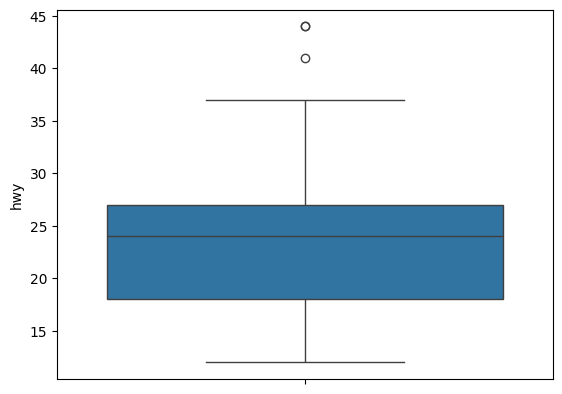

In [19]:
#극단치 제거하기
#상자 그림 살펴보기
mpg = pd.read_csv('mpg.csv')

import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy')

In [20]:
#극단치 기준값 구하기
pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [21]:
pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

In [22]:
#IQR 구하기(사분위범위)
iqr = pct75 - pct25
iqr

9.0

In [23]:
#하한, 상한 구하기
pct25 - 1.5 * iqr

4.5

In [24]:
pct75 + 1.5 * iqr

40.5

In [26]:
#극단치를 결측 처리하기
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5),
                      np.nan, mpg['hwy'])
mpg['hwy'].isna().sum()

3

In [27]:
#결측치 제거하고 분석하기
mpg.dropna(subset = ['hwy']) \
  .groupby('drv') \
  .agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000
